# Unsupervised Machine Learning
- Clustering (mengelompokkan data, tanpa label/ target)
- PCA (teknik mengurangi dimensi)

In [39]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# untuk data preparation
from sklearn.preprocessing import StandardScaler, LabelEncoder

# dataset
from sklearn.datasets import load_breast_cancer

# model yang akan kita gunakan
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

# untuk save model kita pakai pickle
import pickle

# PCA
mengurangi dimensi tanpa mengurangi jumlah fitur.

perlu scaling data supaya akurat

bisa digunakan sebelum membuat model machine learning supervised atau unsupervised untuk mengurangi dimensi data

In [2]:
# 1. siapin data
data_breast = load_breast_cancer()
print(data_breast.data.shape)

(569, 30)


In [3]:
print(data_breast.target.shape)

(569,)


In [4]:
df_breast = pd.DataFrame(data_breast.data, columns=data_breast.feature_names)
df_breast['target'] = data_breast.target
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
data_breast.target_names

# kita bisa ubah target nya dari 0 dan 1 jadi sesuai label

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# ubah target dari 0 dan 1 jadi label
df_breast['target'].replace(0, 'malignant', inplace=True)
df_breast['target'].replace(1, 'benign', inplace=True)

df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [7]:
# 2. data cleaning, exploration, prep
# data scaling

df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df_breast.isnull().sum().sum()

0

In [9]:
# data scaling supaya skala data sama semua
kolom_fitur = data_breast.feature_names
# df_breast[kolom_fitur] # data yang mau di scaling

scaled_data = StandardScaler().fit_transform(df_breast[kolom_fitur])
pd.DataFrame(scaled_data, columns = kolom_fitur)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [10]:
# cari PCA setelah data scaling
# buat dan training model
model_PCA = PCA(n_components=2)
hasil_PCA = model_PCA.fit_transform(scaled_data)

In [11]:
pd.DataFrame(hasil_PCA, columns=["PC1", "PC2"])

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [12]:
# melihat detail setiap Principal Component terbuat dari berapa rasio fitur awal kita
pd.DataFrame(model_PCA.components_, columns = kolom_fitur, index=["PC1", "PC2"])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [13]:
# melihat seberapa berpengaruh setiap Principal Component ke data asli
pd.DataFrame(model_PCA.explained_variance_ratio_, index=["PC1", "PC2"], columns=["variance ratio"])

,variance ratio
PC1,0.442720
PC2,0.189712


In [14]:
# coba kalau PC kita ambil lebih banyak
model_PCA2 = PCA(n_components=10)
hasil_PCA2 = model_PCA2.fit_transform(scaled_data)

display(pd.DataFrame(hasil_PCA2, columns=range(1,11)).head())
display(pd.DataFrame(model_PCA2.components_, columns = kolom_fitur, index=range(1,11)))
display(pd.DataFrame(model_PCA2.explained_variance_ratio_, index=range(1,11), columns=["variance ratio"]))

,1,2,3,4,5,6,7,8,9,10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240989,-0.711906,1.106994
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,0.097372,0.024061,0.454271
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429909,1.059563,-1.405446,-1.116979
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636377,-0.263803,0.377709


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
7,-0.124088,0.011399,-0.114477,-0.051653,-0.140669,0.030919,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177122,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
9,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103342,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
10,0.095486,0.240933,0.086386,0.074956,-0.069293,0.012937,-0.135602,0.008055,0.572070,0.081103,...,0.077362,0.029552,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076650,-0.029563,0.012610


,variance ratio
1,0.442720
2,0.189712
3,0.093932
4,0.066021
5,0.054958
6,0.040245
7,0.022507
8,0.015887
9,0.013896
10,0.011690


# Clustering
## K-Means Clustering

K nya menentukan jumlah cluster yang kita inginkan.

Means nya adalah teknik untuk cari rata-rata

## step k means clustering
1. memilih k jumlah cluster
2. assign titik random sebagai "tengah" dari cluster, misal kita minta 3 cluster, berarti ada 3 "tengah" (centroid) di data kita.
3. assign setiap titik data ke cluster tertentu, dari jarak terpendek titik tersebut ke "tengah" tadi. misalakan centroid1 lebih dekat ke titik A daripada centroid2 dan centroid3, makan titik A masuk cluster si centroid1
4. hitung total inertia setiap centroid. kita menggeser lokasi centroid menjadi lokasi ingertia minimal.
5. ulang step 3 dan 4 sampai:
    - mencapai limit perulangan atau
    - lokasi centroid tidak ada yang berubah

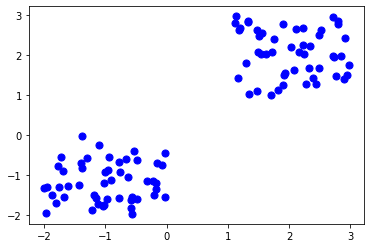

In [15]:
# membuat dummy data untuk latihan KMeans Clustering
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [16]:
pd.DataFrame(X).head()

,0,1
0,-1.099567,-0.252045
1,-1.725241,-0.551673
2,-0.569100,-1.553542
3,-0.533660,-0.406730
4,-1.801384,-1.690126


In [17]:
# memilih jumlah cluster
k = 2 # misalnya 2

# buat model dan latih model
model = KMeans(n_clusters=k, max_iter=100)
model.fit(X)

# cek inertia berapa
print(model.inertia_)

61.453247859149776


apakah pemilihan jumlah cluster 2 sudah baik?

kita bandingkan inertia nya dengan jumlah cluster lainnya

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'elbow plot')

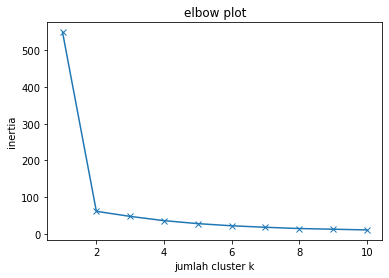

In [18]:
# untuk k dari 1 sampai 11
kumpulan_inertia = []
for k in range(1,11):
    # buat model dan latih model
    model = KMeans(n_clusters=k, max_iter=100)
    model.fit(X)

    # cek inertia berapa
    kumpulan_inertia.append(model.inertia_)
    
# kita akan plot x-axis k, y-axis inertia, untuk dapat "elbow plot"
plt.plot(range(1,11), kumpulan_inertia, marker="x")
plt.xlabel("jumlah cluster k")
plt.ylabel("inertia")
plt.title("elbow plot")

dari elbow plot kelihatannya memilih jumlah cluster k = 2 paling cocok, inertia berkurang banyak dibanding k = 1, dan tidak berkurang banyak saat k = 3

# K-Means Clustering dengan data Customer Wholesale
ada data customer pembeli wholesale (jumlah besar)

kita akan coba kelompokkan menjadi beberapa cluster, supaya bisa tau apakah ada kelompok customer tertentu

In [19]:
# import data
df = pd.read_csv('dataset/Wholesale customers data.csv')
print(df.shape)

(440, 8)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
# explore data sedikit
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [23]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [24]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [25]:
# seperti apa kebiasaan belanja customer kita
# kita gunakan k-means clustering

# scaling dulu biar lebih akurat
data_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
df_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [26]:
# baru lanjut membuat dan melatih model KMeans
k = 3
model = KMeans(n_clusters=3)
model.fit(df_scaled)

print("Inertia", model.inertia_)

Inertia 2149.2839562217573


C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


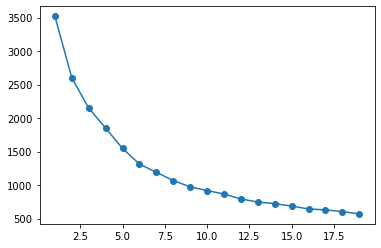

In [27]:
# cari tau dengan elbow plot untuk x-axis jumlah k, dan y-axis inertia, berapa jumlah cluster yang optimal
k_range = range(1,20)
k_inertia = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)

    k_inertia.append(model.inertia_)
    
plt.plot(k_range,k_inertia, marker="o")

dari plot diatas, jumlah k yang optimal sepertinya ada di antara 5-8, misalnya kita pilih 8

In [28]:
# buat copy data awal
df_copy = df.copy()

In [29]:
# buat model KMeans dengan 8 cluster
k=8
model = KMeans(n_clusters=k)
model.fit(df_scaled)

KMeans()

In [30]:
# kita masukkan hasil kalkulasi cluster nya ke data awal
hasil_prediksi =  model.predict(df_scaled)

df_copy['cluster'] = hasil_prediksi
df_copy

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,6
436,1,3,39228,1431,764,4510,93,2346,6
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


kebiasaan belanja customer cluster 0


<AxesSubplot:>

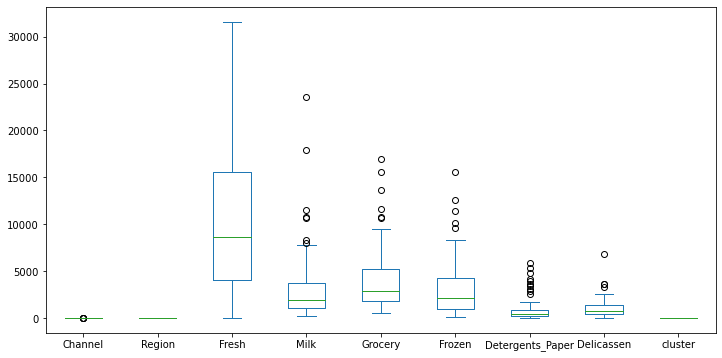

In [31]:
# seperti apa kebiasaan belanja customer di setiap cluster berbeda?
print("kebiasaan belanja customer cluster 0")
df_copy[df_copy['cluster']==0].describe()

df_copy[df_copy['cluster']==0].plot(kind="box", figsize=(12,6))

kebiasaan belanja customer cluster 1


<AxesSubplot:>

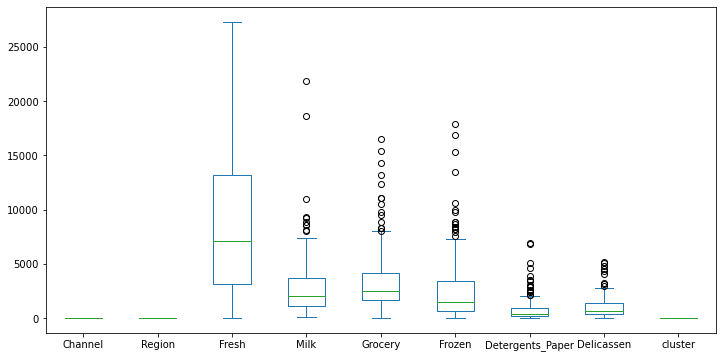

In [32]:
print("kebiasaan belanja customer cluster 1")
df_copy[df_copy['cluster']==1].describe()

df_copy[df_copy['cluster']==1].plot(kind="box", figsize=(12,6))

kebiasaan belanja customer cluster 2


<AxesSubplot:>

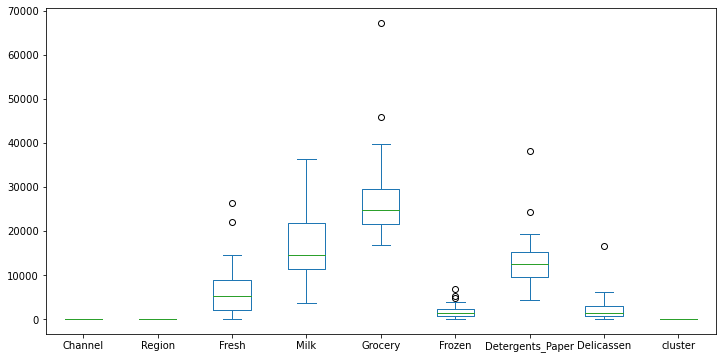

In [33]:
print("kebiasaan belanja customer cluster 2")
df_copy[df_copy['cluster']==2].describe()

df_copy[df_copy['cluster']==2].plot(kind="box", figsize=(12,6))

In [36]:
for c in range(k):
    print("Cluster", c)
    display(df_copy[df_copy['cluster']==c].describe())

Cluster 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,1.047059,1.305882,10292.658824,3219.035294,4079.470588,3137.741176,874.035294,1079.682353,0.0
std,0.213021,0.463515,7772.811405,3731.723151,3324.043574,3085.655465,1246.848680,1026.497619,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.000000,4042.000000,1032.000000,1799.000000,950.000000,205.000000,411.000000,0.0
50%,1.000000,1.000000,8656.000000,1897.000000,2856.000000,2121.000000,392.000000,806.000000,0.0
75%,1.000000,2.000000,15603.000000,3748.000000,5265.000000,4324.000000,821.000000,1360.000000,0.0
max,2.000000,2.000000,31614.000000,23527.000000,16966.000000,15601.000000,5828.000000,6854.000000,0.0


Cluster 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,175.0,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0
mean,1.0,3.0,8816.377143,2952.085714,3427.154286,2680.851429,774.268571,1006.748571,1.0
std,0.0,0.0,6704.260031,2868.998559,2928.153326,3163.003005,1106.855919,1000.703864,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.0
25%,1.0,3.0,3127.000000,1149.500000,1653.000000,646.000000,173.500000,351.000000,1.0
50%,1.0,3.0,7149.000000,2037.000000,2500.000000,1517.000000,353.000000,693.000000,1.0
75%,1.0,3.0,13199.500000,3733.000000,4196.500000,3380.500000,916.000000,1349.000000,1.0
max,1.0,3.0,27329.000000,21858.000000,16483.000000,17866.000000,6907.000000,5137.000000,1.0


Cluster 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,2.0,2.322581,6406.741935,16539.548387,27473.096774,1784.677419,13570.000000,2464.806452,2.0
std,0.0,0.832150,6151.356262,7892.345912,9949.734949,1620.362807,6189.884743,3157.925653,0.0
min,2.0,1.000000,85.000000,3737.000000,16767.000000,36.000000,4337.000000,37.000000,2.0
25%,2.0,2.000000,2063.000000,11403.000000,21550.500000,719.000000,9567.500000,720.500000,2.0
50%,2.0,3.000000,5181.000000,14641.000000,24773.000000,1274.000000,12420.000000,1423.000000,2.0
75%,2.0,3.000000,8881.500000,21728.000000,29582.000000,2186.000000,15155.000000,3003.500000,2.0
max,2.0,3.000000,26373.000000,36423.000000,67298.000000,6746.000000,38102.000000,16523.000000,2.0


Cluster 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0
mean,2.0,2.742574,8205.643564,7620.396040,11773.306931,1443.198020,4822.712871,1500.663366,3.0
std,0.0,0.577122,7473.071407,3495.378701,4653.231107,1659.783468,2161.794552,1374.953769,0.0
min,2.0,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,3.0
25%,2.0,3.000000,2320.000000,5403.000000,8713.000000,398.000000,3415.000000,531.000000,3.0
50%,2.0,3.000000,6353.000000,7097.000000,11091.000000,959.000000,4538.000000,1282.000000,3.0
75%,2.0,3.000000,12238.000000,9763.000000,13916.000000,1691.000000,6707.000000,2098.000000,3.0
max,2.0,3.000000,31714.000000,20655.000000,28986.000000,11559.000000,10069.000000,7844.000000,3.0


Cluster 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0


Cluster 5


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,4.0,4.0,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.0
mean,2.0,3.0,29862.500000,53080.750000,60015.750000,3262.25000,27942.250000,3082.250000,5.0
std,0.0,0.0,12744.805595,15078.394839,24979.551963,3194.04575,9013.917586,2404.578879,0.0
min,2.0,3.0,16117.000000,38369.000000,32114.000000,987.00000,20070.000000,903.000000,5.0
25%,2.0,3.0,21223.000000,44240.000000,49706.750000,1016.25000,23145.750000,1738.500000,5.0
50%,2.0,3.0,29433.500000,50228.000000,57584.500000,2140.00000,25436.000000,2480.500000,5.0
75%,2.0,3.0,38073.000000,59068.750000,67893.500000,4386.00000,30232.500000,3824.250000,5.0
max,2.0,3.0,44466.000000,73498.000000,92780.000000,7782.00000,40827.000000,6465.000000,5.0


Cluster 6


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,1.048780,2.780488,39870.292683,4916.853659,5740.585366,6566.926829,901.268293,2595.951220,6.0
std,0.218085,0.612870,16957.055889,5207.698069,4511.074428,5227.961627,1037.518892,3171.477833,0.0
min,1.000000,1.000000,18291.000000,286.000000,471.000000,321.000000,20.000000,3.000000,6.0
25%,1.000000,3.000000,29703.000000,2100.000000,2609.000000,2540.000000,314.000000,960.000000,6.0
50%,1.000000,3.000000,36817.000000,3836.000000,4955.000000,5243.000000,600.000000,1819.000000,6.0
75%,1.000000,3.000000,43265.000000,5010.000000,7326.000000,9510.000000,1092.000000,2876.000000,6.0
max,2.000000,3.000000,112151.000000,29627.000000,21042.000000,18711.000000,4948.000000,14472.000000,6.0


Cluster 7


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.0
mean,1.0,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.50000,7.0
std,0.0,0.707107,15134.206438,9683.120262,8176.982818,18285.781361,849.235244,2058.38784,0.0
min,1.0,2.000000,11314.000000,3090.000000,2062.000000,35009.000000,71.000000,2698.00000,7.0
25%,1.0,2.250000,16664.750000,6513.500000,4953.000000,41474.000000,371.250000,3425.75000,7.0
50%,1.0,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.50000,7.0
75%,1.0,2.750000,27366.250000,13360.500000,10735.000000,54404.000000,971.750000,4881.25000,7.0
max,1.0,3.000000,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.00000,7.0


In [37]:
df_copy[df_copy['cluster']==4]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
183,1,3,36847,43950,20170,36534,239,47943,4


# Save Model menggunakan Pickle
model machine learning yang sudah kita buat bisa kita export menjadi file terpisah.

kita akan gunakan pickle untuk melakukan hal tersebut.

In [40]:
# untuk contoh menggunakan pickle, kita akan ambil model naive bayes yang kita buat
# di sesi sebelum

# buat dummy data
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# encoding
le = LabelEncoder()
weather_en = le.fit_transform(weather)
weather_label = le.classes_

temp_en = le.fit_transform(temp)
temp_label = le.classes_

play_en = le.fit_transform(play)
play_label = le.classes_

df = pd.DataFrame({"weather": weather_en, "temp":temp_en, "play":play_en})
features = df[['weather', 'temp']]
target = df['play']

# buat dan latih model
model = GaussianNB()
model.fit(features, target)

# save model yang sudah kita buat ke file terpisah
pickle.dump(model, open('play_model.pickle', 'wb'))